Nicholas De Santos

DSC 680

Final Project 1 

# Background/History and our Business Problem

    Great films have always influenced society. And vise versa. Films tell us a lot about the time in which they were 
    released. You see things like Godzilla which on surface level is just a giant lizard terrorizing a city but in behind 
    the scenes you see a comment on the unfortunate horrors of the attomic bomb attack against Japan. The event in turn
    influenced a lot of Japenese film. Especially horror. This just goes to show the power of movies. More importantly, the
    power of understanding how audiences feel about certain movies. Understanding what types of movies tend to be popular 
    among the public also shines a light on what interests people the most. The purpose of this project is to investigate 
    what sort of attributes and features a major film could have that would boost the film's ratings from its viewers.

# Data Explanation (Data Prep, Data Dictionary, etc)

    The data that we will be using a data set found on Kaggle.com titled "IMDb 5000+ Movies & Multiple Genres Dataset". 
    This dataset has over 5000 different movie titles all containing informating on the movie title, release year, 
    director, actors, ratings, runtime in minutes, censor rating, rotal gross revenue, main genre and side genres 
    (G, 2022). Below are the descriptions for each of the varaibles in the dataset.
    
    'Movie_Title' : Consist of 5000+ Movie Titles (5000+ Unique Values)
    'Year' : Ranging from 1920s to 2022 (99 Unique Values)
    'Director' : Names the Director (2000+ Unique Values)
    'Actors' : Names the Actors (5000+ Unique & Multiple Values)
    'Rating' : Titles rated for 10 by 25k+ Voters (74+ Unique Values)
    'main_genre' : Main Genre of the Title (13+ Unique Values)
    'side_genre' : Side / Multiple Genre of the Movie (144+ Unique & Multiple Values)
    'Runtime(Mins)' : Total duration of the movie in Minutes (156+ Unique Values)
    'Censor' : Censorship of the Movie (25+ Unique Values)
    'Total_Gross' : Total Box-Office Collection of the Movie (3500+ Unique Values)
    
    Since the main goal of our investigation is to see what attributes and features aare associated with more popular 
    films, we will use the user rating variable "Rating" as our target variable when we get into our model building process.
    
### Importing Data and Main Packages

    Before we can begin to build our model we must first load our data. A view of what the data looks like can be found 
    in the appendix at the end of this report. Our data will be saved into a dataframe object 'movies'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading Data
movies = pd.read_csv('movies.csv')
movies = pd.DataFrame(movies)
original_data = movies

### Examining and Cleaning Data

    Once our data has been loaded and saved in a dataframe, we can start examining the data more closely. Then we can 
    see what we need to do in order to clean and prepare the data for our analysis.
    
    The first thing that we did was we noticed that the total gross revenue variable was not a numeric varaible so we 
    took just the numbers and then turned the column into a numeric object. We can then check that the object conversion 
    was successful as well.

In [2]:
#Convert "Total_Gross" value to numerical variable
import re
movies['Total_Gross'] = movies['Total_Gross'].str.extract(r'(\d+\.\d+)')
movies['Total_Gross'] = pd.to_numeric(movies['Total_Gross'])
print(movies['Total_Gross'].dtype)

float64


    In this next portion of the code we want to see all the different unique values for each of the categorical
    variables. This helps us decide to exclude the director variable later on in our model building process due to too many
    unique values. It no longer served as a category and was deemed unecessary in the model building process as well. It
    can also be useful in pointing out errors/misspelled strings in the categorical data.

In [3]:
#Unique Values for Director
print(movies['Director'].value_counts())

Director
Woody Allen                                                          40
Clint Eastwood                                                       32
Steven Spielberg                                                     28
Ron Howard                                                           24
Steven Soderbergh                                                    23
                                                                     ..
Directors:Mike Judge, Mike de Seve, Brian Mulroney, Yvette Kaplan     1
Directors:Aaron Blaise, Robert Walker                                 1
Stephen J. Anderson                                                   1
Directors:Byron Howard, Chris Williams                                1
Gökhan Gök                                                            1
Name: count, Length: 2320, dtype: int64


In [4]:
#Unique Values for Censor Rating
print(movies['Censor'].value_counts())

Censor
UA           1118
A            1101
U            1023
R             926
Not Rated     495
PG-13         405
18            136
PG            120
16             71
13             53
UA 16+         22
15+            18
7              17
UA 13+         12
G               9
(Banned)        8
UA 7+           7
12+             5
All             5
Unrated         4
U/A             2
18+             2
12              1
M/PG            1
NC-17           1
Name: count, dtype: int64


In [5]:
#Unique Values for Main Genre
print(movies['main_genre'].value_counts())

main_genre
Action       1577
Comedy       1350
Drama        1027
Crime         447
Biography     355
Animation     321
Adventure     296
Horror        142
Mystery        26
Fantasy        13
Western         4
Film-Noir       3
Musical         1
Name: count, dtype: int64


    In this portion of the code we are able to remove any duplicate rows in our dataset, remove any missing values 
    within the dataset and removed both the actor, side genre and director our of our dataset. We also do some renaming 
    of the columns within the dataset to make it easier to read and use within the code. We can finally have a look at 
    what the final dataset looks like and move onto our data exploration and analysis.

In [6]:
#Getting Rid of Duplicates: keeping first duplicate row
movies = movies.drop_duplicates()

#Getting Rid of Missing Value Rows: Based on NA values
movies = movies.dropna()

#Getting Rid of Actor and Side Genre columns
movies = movies.drop(columns=['side_genre'])
movies = movies.drop(columns=['Actors'])

#Renaming Columns
movies.rename(columns = {'Runtime(Mins)':'Runtime'}, inplace = True)
movies.rename(columns = {'Movie_Title':'Title'}, inplace = True) 
movies.rename(columns = {'Total_Gross':'GrossRev'}, inplace = True)
movies.rename(columns = {'main_genre':'Genre'}, inplace = True) 

movies

,Title,Year,Director,Rating,Runtime,Censor,GrossRev,Genre
1,The Dark Knight,2008,Christopher Nolan,9.0,152,UA,534.86,Action
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,9.0,201,U,377.85,Action
3,Inception,2010,Christopher Nolan,8.8,148,UA,292.58,Action
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,8.8,179,UA,342.55,Action
5,The Lord of the Rings: The Fellowship of the Ring,2001,Peter Jackson,8.8,178,U,315.54,Action
...,...,...,...,...,...,...,...,...
5555,Son of the Mask,2005,Lawrence Guterman,2.2,94,U,17.02,Comedy
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer",1.9,87,PG-13,14.19,Comedy
5558,The Hottie & the Nottie,2008,Tom Putnam,1.9,91,PG-13,0.03,Comedy
5559,From Justin to Kelly,2003,Robert Iscove,1.9,81,PG,4.92,Comedy


# Methods

    Before getting into the model building process, we first conducted some exploratory data analysis on our data to 
    investigate what kind of patterns and relationships we can find in the data before we create a model. It is in this
    state that we explored each varaible's relationship with our target varaible, including categorical variables. The
    purpose of those steps was to be able to give us a hint as to what varaibles should or shouldn't be included in
    the model building process as well as to shine a light on what varaibles are most important in the model.
    
    After our data exploration, we finally get into our model creation process. Before we could use our data to train
    a model we first had to convert all of our categorical varaibles to dummy varaible in order to be used for linear
    regression in the model building process.
    
    We then split that new dataframe with dummy varaibles instead of categorical varaibles into training and testing
    sets of the original data. We built our model with the training dataset and then later evaluated that model using
    the RMSE value of our testing set compared to the model predictions.

# Analysis

### Data Exploration

    Next we move onto exploring any possible relationships between the variables. To do so we look at both the scatter 
    plot graph of each variable along with our target variable "Rating" along with the correlation coreficient between 
    those two variables.
    
    
#### Numerical Varaibles

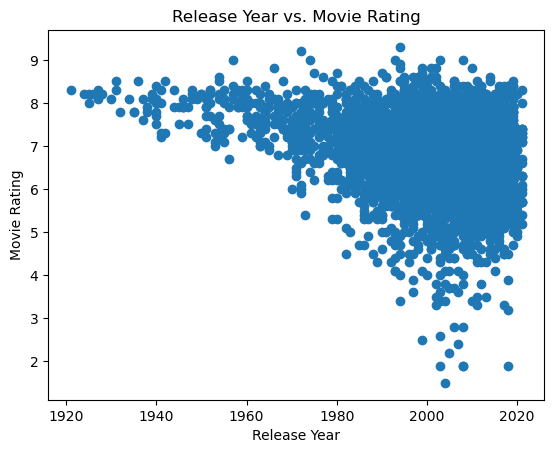

PearsonRResult(statistic=-0.2631474562741687, pvalue=3.3952118104659924e-75)


In [7]:
#Exploring Relationships: Year vs Rating

fig, ax = plt.subplots()
plt.scatter(movies.Year, movies.Rating)
plt.xlabel("Release Year")
plt.ylabel("Movie Rating")
plt.title("Release Year vs. Movie Rating")

plt.show()

import scipy.stats as stats

#correlation coefficient and PValue
correlation = stats.pearsonr(movies.Year, movies.Rating)
print(correlation)

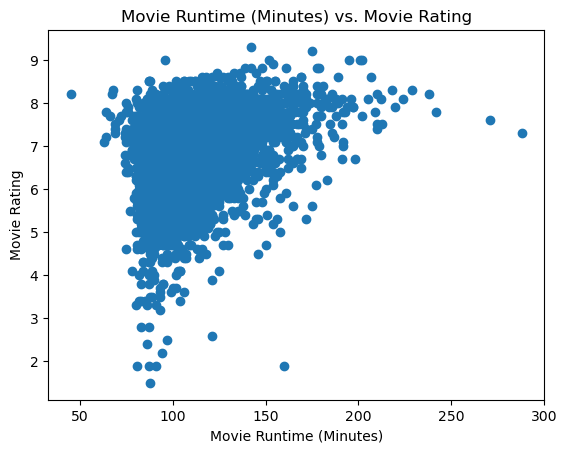

PearsonRResult(statistic=0.35976408087247, pvalue=1.944673821726563e-143)


In [8]:
#Exploring Relationships: Runtime vs Rating

fig, ax = plt.subplots()
plt.scatter(movies.Runtime, movies.Rating)
plt.xlabel("Movie Runtime (Minutes)")
plt.ylabel("Movie Rating")
plt.title("Movie Runtime (Minutes) vs. Movie Rating")

plt.show()

#correlation coefficient and PValue
correlation = stats.pearsonr(movies.Runtime, movies.Rating)
print(correlation)

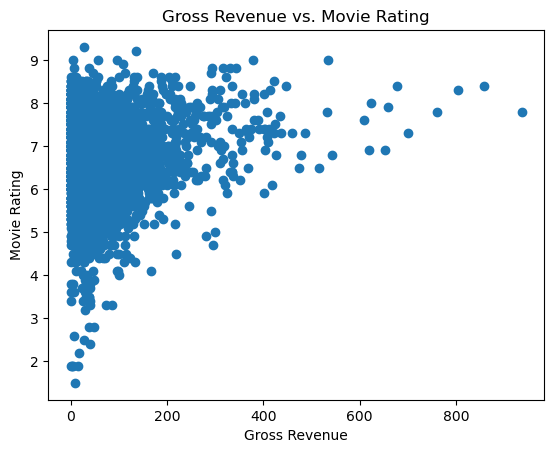

PearsonRResult(statistic=0.07276128277732986, pvalue=6.026534178753546e-07)


In [9]:
#Exploring Relationships: Year vs Rating

fig, ax = plt.subplots()
plt.scatter(movies.GrossRev, movies.Rating)
plt.xlabel("Gross Revenue")
plt.ylabel("Movie Rating")
plt.title("Gross Revenue vs. Movie Rating")

plt.show()

#correlation coefficient and PValue
correlation = stats.pearsonr(movies.GrossRev, movies.Rating)
print(correlation)

#### Categorical Varaibles

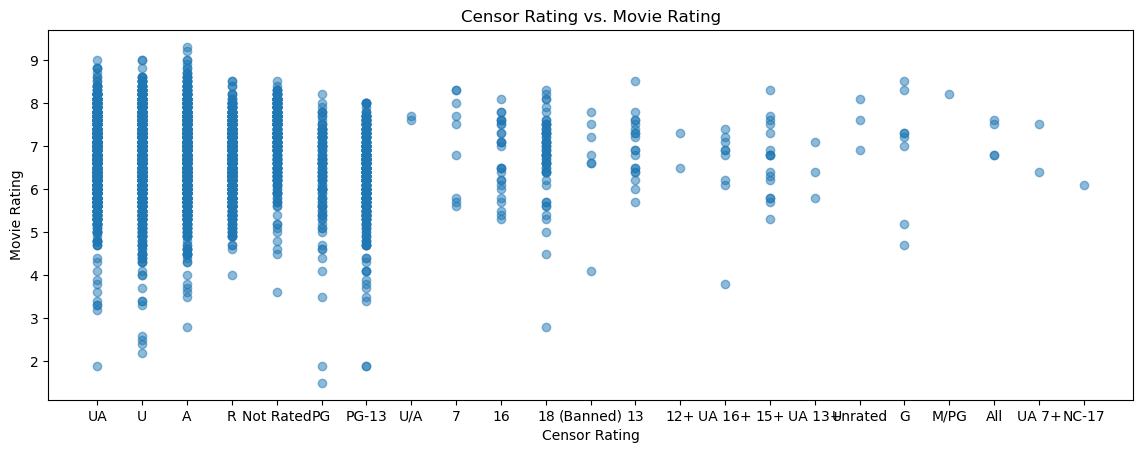

In [13]:
#Exploring Relationships: Censor Rating vs Movie Rating

fig, ax = plt.subplots()
fig.set_figwidth(14)
plt.scatter(movies.Censor, movies.Rating, alpha = 0.5)
plt.xlabel("Censor Rating")
plt.ylabel("Movie Rating")
plt.title("Censor Rating vs. Movie Rating")

plt.show()

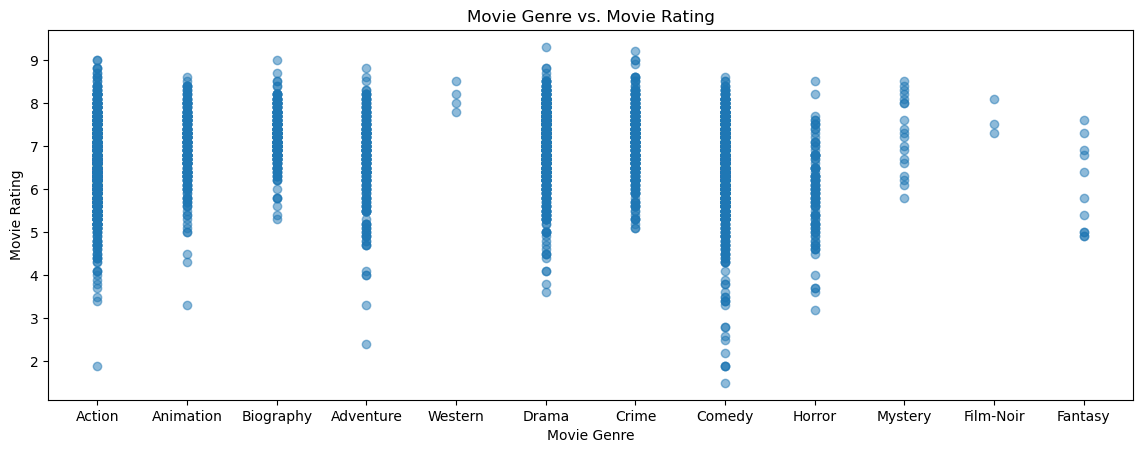

In [12]:
#Exploring Relationships: Genre vs Movie Rating

fig, ax = plt.subplots()
fig.set_figwidth(14)
plt.scatter(movies.Genre, movies.Rating, alpha = 0.5)
plt.xlabel("Movie Genre")
plt.ylabel("Movie Rating")
plt.title("Movie Genre vs. Movie Rating")

plt.show()

### Model Creation and Testing

    Finally, we get to our model building process in order to try and predict the viewer rating of a film. Before we start 
    the process we first want to get the correct formatting and object types for model creation. We first start with 
    turning our categorical variables into dummy varaibles that we can use for linear regression.

In [14]:
#Turn categorical varaibles to dummy varaibles for model creation process
moviemod = movies
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer() 
label_binarizer_output = label_binarizer.fit_transform(moviemod['Censor']) 
censord = pd.DataFrame(label_binarizer_output, columns = label_binarizer.classes_)

label_binarizer_output = label_binarizer.fit_transform(moviemod['Genre']) 
genred = pd.DataFrame(label_binarizer_output, columns = label_binarizer.classes_) 

moviemod = moviemod.drop(['Title', 'Director', 'Censor', 'Genre'], axis=1)
moviemod = pd.concat([moviemod, censord, genred], axis=1, join='inner')
moviemod

,Year,Rating,Runtime,GrossRev,(Banned),12+,13,15+,16,18,...,Animation,Biography,Comedy,Crime,Drama,Fantasy,Film-Noir,Horror,Mystery,Western
1,2008,9.0,152,534.86,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2003,9.0,201,377.85,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,8.8,148,292.58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2002,8.8,179,342.55,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2001,8.8,178,315.54,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,2003,6.1,92,36.92,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4690,2002,6.1,117,9.68,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4691,2001,6.1,109,13.73,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4692,2000,6.1,103,37.17,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


    Next we split our data into two different sets. The first set is the trianing set that we will use to make our 
    model. The other set is the testing set. The testing set is used to test the model's performance.

In [15]:
#Splitting Training and Testing Sets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
# get the locations
X = moviemod.drop(['Rating'], axis=1)
y = moviemod['Rating']
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

# Results and Conclusion

In [16]:
#Creating Linear Regression Model
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.6971517528316209


    As you can see, we used our training x variables of our data to create our model which later produced viewer rating 
    predictions for the various attributes in our testing x variables. We then used those predictions and compared them 
    to the actual target varaible values (y_test) and got an RMSE value of about 0.6972. The cut off of what is an
    "acceptable" RMSE value is typically 0.5 so you can see that we were close but not quite there. This might be a good
    reason to future the investigation and work on an improved model.

# Assumptions

    For our data we assume that the information about the films listed in the dataset are completely accurate and up to 
    date as far as the documentation states in the Kaggle description. We also assume all the necessary assumtion to use 
    linear regression in our model building process. The assumptions include the assumption that the chosen sample is 
    representative of the population. The assmtion that there is a linear relationship between the independent variable(s) 
    and the dependent variable. And the assumption that all the variables are normally distributed.

# Limitations

    Some limitations to this project and investigation was the data that we were able to use, the time given to hold
    the investigation and get our results, and our technical skills with Python as a programming language.

# Challenges

    The main challenges that we faced was mostly the data preparation and cleaning. It was difficult deciding what 
    columns/varaibles we would keep in our model as well.

# Future Uses/Additional Applications

    In terms of what this model could be used for, the model we created can be used to predict the popularity of new 
    films based on given features which was one of our original goals. The model can also be used to compare films 
    actual performance to what the model predicted and use those results to continue to better our model and increase 
    the accuracy. 

# Ethical Assessment

    In terms of how ethical this process was. I don't belive there was much of a breach in private information. we 
    beleive because the information provided for all the movie titles can be easily found online there are no ethical 
    concerns for the names of actors or directors listed in the dataset. There could be some copyright and property issues 
    if this model were to be used in some kind of business advancement in the film industry without addressing the rightful
    owners that intelectual property. That is a valid concern.

# References

G, R. A. (2022, October 29). IMDB 5000+ movies & multiple genres dataset. Kaggle. https://www.kaggle.com/datasets/rakkesharv/imdb-5000-movies-multiple-genres-dataset?resource=download 

# Appendix


Table 1: Original Dataframe

In [23]:
original_data

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,NaN,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,534.86,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,377.85,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,292.58,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,342.55,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,14.19,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,0.03,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,4.92,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,9.11,Comedy,"Family, Sci-Fi"
